In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('teams.csv')

In [3]:
df.head(5)

,change,competitionId,entries,lastSubmission,medal,rank,score,sourceKernelName,sourceKernelUrl,teamId,teamMembers,teamName,realTeam
0,136.0,6004,2,2017-04-12T15:29:06.7133333Z,gold,1.0,0.39975,NaN,NaN,583169,"[{'profileUrl': '/badrobot', 'thumbnailUrl': '...",grt123,"['/badrobot', '/grt123', '/liaofz']"
1,87.0,6004,2,2017-04-10T15:50:10.5066667Z,gold,2.0,0.40117,NaN,NaN,517341,"[{'profileUrl': '/dhammack', 'thumbnailUrl': '...",Julian de Wit & Daniel Hammack,"['/dhammack', '/juliandewit']"
2,23.0,6004,2,2017-04-11T14:59:55.6166667Z,gold,3.0,0.40127,NaN,NaN,549155,"[{'profileUrl': '/timsalimans', 'thumbnailUrl'...",Aidence,"['/gerbenvv', '/markjan', '/timsalimans']"
3,157.0,6004,3,2017-04-09T08:32:27.7366667Z,gold,4.0,0.40183,NaN,NaN,451405,"[{'profileUrl': '/jdingpku', 'thumbnailUrl': '...",qfpxfd,"['/jdingpku', '/jiabao', '/jiayuangu', '/lax12..."
4,349.0,6004,8,2017-04-12T13:59:14.57Z,gold,5.0,0.40409,NaN,NaN,447696,"[{'profileUrl': '/pfillard', 'thumbnailUrl': '...",Pierre Fillard (Therapixel),['/pfillard']


In [4]:
dfList = list(df['teamMembers'])
dfList

["[{'profileUrl': '/badrobot', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/412781-gp.jpg', 'tier': 'expert', 'displayName': 'Bad Robot'}, {'profileUrl': '/liaofz', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/501283-kg.jpg', 'tier': 'master', 'displayName': 'Fangzhou Liao'}, {'profileUrl': '/grt123', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'expert', 'displayName': 'grt123'}]",
 "[{'profileUrl': '/dhammack', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/31119-kg.jpg', 'tier': 'grandmaster', 'displayName': 'dhammack'}, {'profileUrl': '/juliandewit', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/38113-fb.jpg', 'tier': 'grandmaster', 'displayName': 'Julian de Wit'}]",
 "[{'profileUrl': '/timsalimans', 'thumbnailUrl': 'https://storage.googleapis.com/kaggle-avatars/thumbnails/default-thumb.png', 'tier': 'grandmaster',

In [50]:
import ast
import json

In [51]:
dictmenber = []

for i in range(len(dfList)):
    toadicto = dfList[i]
    json_data = ast.literal_eval(toadicto)
    dictmenber.append(json_data)
for n in range(len(dictmenber)):
    list_one = dictmenber[n]
    for v in range(len(list_one)):
        list_two = dictmenber[n][v]
        if 'profileUrl' in list_two: del list_two['profileUrl']
        if 'thumbnailUrl' in list_two: del list_two['thumbnailUrl']

In [67]:
dictmenber[0]

[{'tier': 'expert', 'displayName': 'Bad Robot'},
 {'tier': 'master', 'displayName': 'Fangzhou Liao'},
 {'tier': 'expert', 'displayName': 'grt123'}]

In [98]:
import networkx as nx
G = nx.Graph()

In [104]:
G.clear #Reiniciamos G.

G.add_node(dictmenber[0][0]['displayName'])
G.add_node(dictmenber[0][1]['displayName'])
G.add_node(dictmenber[0][2]['displayName'])

print("1. El grafo G tiene los nodos: " + str(list(G.nodes())))

1. El grafo G tiene los nodos: ['Bad Robot', 'Fangzhou Liao', 'grt123']


In [103]:
contador = 0
for i in range(3):
    for v in range(3):
        if v != contador:
            G.add_edge(dictmenber[0][i]['displayName'],dictmenber[0][v]['displayName'])
    contador += 1
    
print("1. El grafo G tiene las aristas: " + str(list(G.edges())))

1. El grafo G tiene las aristas: [('Bad Robot', 'Fangzhou Liao'), ('Bad Robot', 'grt123'), ('Fangzhou Liao', 'grt123')]


In [106]:
#G.add_edge(dictmenber[0][0]['displayName'],dictmenber[0][1]['displayName'])
#G.add_edge(dictmenber[0][0]['displayName'],dictmenber[0][2]['displayName'])

#G.add_edge(dictmenber[0][1]['displayName'],dictmenber[0][0]['displayName'])
#G.add_edge(dictmenber[0][1]['displayName'],dictmenber[0][2]['displayName'])

#G.add_edge(dictmenber[0][2]['displayName'],dictmenber[0][0]['displayName'])
#G.add_edge(dictmenber[0][2]['displayName'],dictmenber[0][1]['displayName'])


#print("1. El grafo G tiene las aristas: " + str(list(G.edges())))

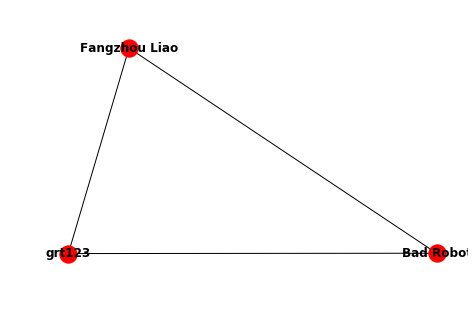

In [108]:
import matplotlib.pyplot as plt
nx.draw_random(G, with_labels=True, font_weight='bold')